#Pedestrian Data Analysis

Use an API to retreive information from Mapillary describing the location of high density crossings and flashing walk signs to guide the zoning of new pedestrian safe zones by city officials. The interface for the API has already been written for a previous Hack For LA project.


Purpose: 

    1. Bike and accident stats
    2. Reduce accidents
    3. Incentivize more use of biking and walking

Greater Wilshire neighborhood

Stakeholder: Dan Kegel

Who to Contact: Ryan Swan or Sophia Alice

Volunteers: Derek Plemons and Henry Kaplan

## Map Feature Object

URL: https://www.mapillary.com/developer/api-documentation/#submit-a-changeset

A map feature is represented as a GeoJSON feature with arbitrary geometry type. The geometry represents the region or the location of the map feature. A map feature has the following properties:

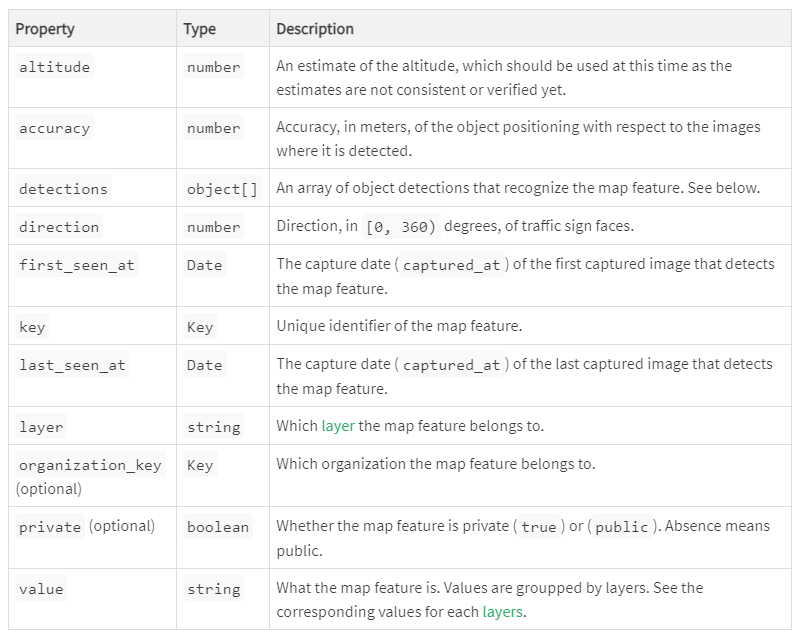

##Traffic Signs of Interest: 

value column - 
    
1. regulatory--pedestrians-push-button--g1
2. regulatory--pedestrians-push-button--g2
3. regulatory--bicycles-push-button--g1
4. regulatory--bicycles-push-button--g2
5. regulatory--crosswalk-stop-on-red--g1
6. regulatory--cross-only-on-pedestrian-signal--g1
7. regulatory--cross-only-on-green--g1
8. regulatory--crosswalk-stop-on-red--g1
9. regulatory--use-crosswalk--g1
10. regulatory--in-street-pedestrian-crossing--g1
11. regulatory--turning-vehicles-yield-to-pedestrians--g1
12. regulatory--stop-here-on-red-or-flashing-light--g1
13. regulatory--stop-here-on-red-or-flashing-light--g2
14. regulatory--pedestrians-priority-zone--g1
15. warning--pedestrians-crossing--g4

## Data

1. Mapillary API: (Documentation) https://www.mapillary.com/developer/api-documentation/#traffic-signs
2. 2019 Walk Bike Count: https://data.lacity.org/dataset/2019-Walk-Bike-Count-Data/m6qi-ifup
3. Traffic Accidents by Date: https://data.lacity.org/Public-Safety/Traffic-Accidents-by-date/2mzm-av8t
4. Mapping LA's Most Dangerous Intersections: https://la.curbed.com/2013/9/20/10195638/mapping-los-angeless-53-most-dangerous-intersections

##Questions

1. What is the designation for a flashing walk sign?
2. How do we identify high density crossings?
3. What should the deliverable look like? (Tableau Interactive Dashboard?)

## Next Steps:

Check email for 

1. Contact 311-data from neighborhood shapefile
2. Get neighborhood from Ryan - Greater Wilshire
3. Configure API to pull points
4. Github repo - work under mapillary or create new repo/ directory
5. Requirements / deliverable clarification
6. Find more datasets
7. Pull pictures associated with flashing walk signs and high density crossings.
    
    a. Match to values column

8. Plot data in interactive map: https://jimking100.github.io/2019-09-04-Post-3/ ?
9. Cluster signs and accidents
10. Possible application for other LA Neighborhoods





In [1]:
# Install Geopandas to plot coordinates
!pip install geopandas

     |████████████████████████████████| 1.0MB 6.9MB/s 
     |████████████████████████████████| 6.6MB 22.2MB/s 
     |████████████████████████████████| 15.3MB 224kB/s 


In [2]:
# Import Python Libraries
import pandas as pd
import numpy as np
from shapely.geometry import Point, Polygon # Converting latitude/ longitude to geometry
import geopandas as gpd # Create geodataframe
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import os
import copy

In [3]:
# Connect to Google Drive to access csv file
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Set path on Drive to access directory
path = "/content/drive/MyDrive/Pedestrian_Data" # /content is pretty much the root. you can choose other path in your colab workspace
os.chdir(path)

In [5]:
# Show directory contents
#ls

# Mapillary Traffic Signs Data Cleaning and Exploration

In [6]:
# Read csv file into pandas dataframe
pedestrian = pd.read_csv('Data/latrafficsigns04212021.csv')

In [7]:
# Split coordinates column into longitude and latitude columns
pedestrian[['longitude', 'latitude']] = pedestrian.coordinates.str.strip('[]').str.split(",", expand=True).apply(pd.to_numeric)

In [8]:
# Check how many records are in the dataset and if we have any NA
pedestrian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399949 entries, 0 to 399948
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     399949 non-null  int64  
 1   accuracy       399949 non-null  float64
 2   altitude       399949 non-null  float64
 3   direction      399949 non-null  float64
 4   first_seen_at  399949 non-null  object 
 5   last_seen_at   399949 non-null  object 
 6   key            399949 non-null  object 
 7   layer          399949 non-null  object 
 8   value          399949 non-null  object 
 9   coordinates    399949 non-null  object 
 10  geometry_type  399949 non-null  object 
 11  longitude      399949 non-null  float64
 12  latitude       399949 non-null  float64
dtypes: float64(5), int64(1), object(7)
memory usage: 39.7+ MB


In [9]:
# Count of unique values in each column
print(pedestrian.nunique())

Unnamed: 0       399949
accuracy         398108
altitude         397507
direction        396395
first_seen_at    302562
last_seen_at     302988
key              399949
layer                 1
value               650
coordinates      399946
geometry_type         1
longitude        399946
latitude         399946
dtype: int64


In [10]:
# Count frequency of each variable in value column
print(pedestrian['value'].value_counts().nlargest(10))

information--general-directions--g1          78538
general--traffic-sign--g1                    58307
regulatory--no-parking--g2                   36205
regulatory--stop--g1                         33109
regulatory--no-parking-or-no-stopping--g3    31390
information--highway-interchange--g1         14805
warning--texts--g2                            8917
regulatory--priority-road--g1                 6518
warning--school-zone--g2                      5330
regulatory--no-u-turn--g1                     5249
Name: value, dtype: int64


##Plotting coordinates with Geopandas

In [11]:
# creating a geometry column 
geometry = [Point(xy) for xy in zip(pedestrian['longitude'], pedestrian['latitude'])]

# Coordinate reference system : WGS84
crs = {'init': 'epsg:4326'}

# Creating a Geographic data frame 
gdf = gpd.GeoDataFrame(pedestrian, crs=crs, geometry=geometry)

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [12]:
gdf.head()

Unnamed: 0  accuracy  ...   latitude                     geometry
0           0  2.283149  ...  34.175019  POINT (-118.34901 34.17502)
1           1  0.597160  ...  34.049253  POINT (-118.18913 34.04925)
2           2  0.347262  ...  34.179654  POINT (-118.38132 34.17965)
3           3  1.012830  ...  33.925972  POINT (-118.31599 33.92597)
4           4  5.147048  ...  33.825000  POINT (-118.21986 33.82500)

[5 rows x 14 columns]

In [13]:
gdf.to_csv(r'Data/la_traffic_signs_cleaned.csv', index = False)

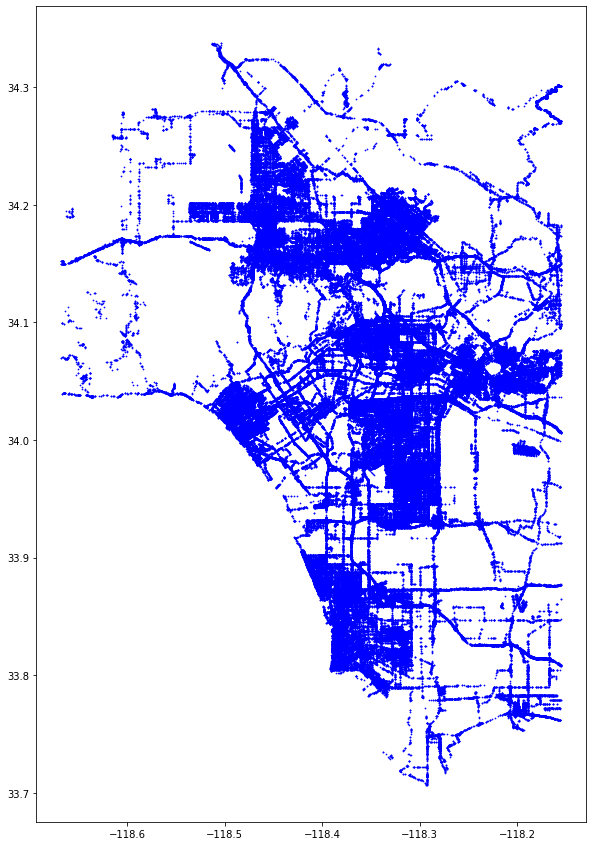

In [14]:
# Plot all points
gdf.plot(marker='o', color='b', markersize=0.5, figsize=(15,15))

## Plot map with LA shape file

In [15]:
# Import LA City Neighborhood Council shape file
neighborhood_map = gpd.read_file('Shape_Files/Neighborhood_Councils/geo_export_af1358cf-791c-45e4-9516-891a3e540f56.shp')

In [16]:
neighborhood_map.head()

date_certi  ...                                           geometry
0  2002-10-22  ...  POLYGON ((-118.45005 34.24992, -118.45055 34.2...
1  2002-10-02  ...  POLYGON ((-118.22325 34.10393, -118.22367 34.1...
2  2003-02-11  ...  POLYGON ((-118.27576 34.15376, -118.26184 34.1...
3  2002-10-08  ...  POLYGON ((-118.47485 34.12634, -118.47411 34.1...
4  2002-05-21  ...  POLYGON ((-118.21439 34.06063, -118.21303 34.0...

[5 rows x 9 columns]

In [17]:
# Create shape file with only Greater Wilshire
Greater_Wilshire = neighborhood_map[neighborhood_map.name.isin(['GREATER WILSHIRE NC'])]
Greater_Wilshire.head()

date_certi  ...                                           geometry
32  2003-12-02  ...  POLYGON ((-118.34406 34.08708, -118.33098 34.0...

[1 rows x 9 columns]

In [18]:
# Import street map shape file
street_map = gpd.read_file('Shape_Files/LA_county_roads/tl_2018_06037_roads.shp')

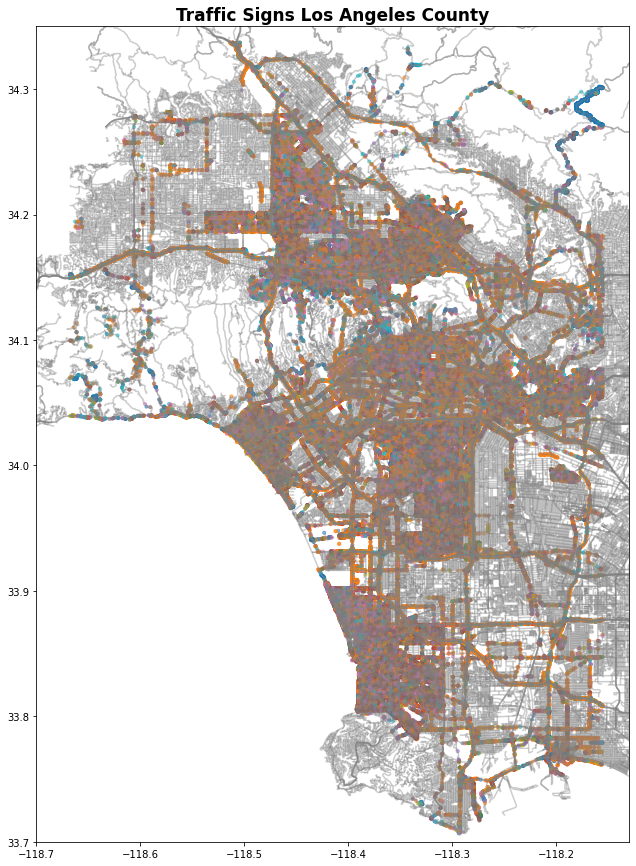

In [19]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15,15))
# add .shp mapfile to axes
street_map.plot(ax=ax, alpha=0.4, color='grey')
# add geodataframe to axes
# assign ‘price’ variable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
gdf.plot(column='value',ax=ax,alpha=0.5,markersize=10)
# add title to graph
plt.title("Traffic Signs Los Angeles County", fontsize=17,fontweight="bold")
# add legends and set its box position
#plt.legend(labels='value', bbox_to_anchor=(0.6, 1.2))
# set latitiude and longitude boundaries for map display
plt.xlim(-118.7,-118.13)
plt.ylim( 33.7,34.35)
# show map
plt.show()

## Create new dataframe filtered by pedestrian crosswalks

In [20]:
# Filter dataset to only those with pedestrian or bicycle crosswalks
values = ['regulatory--pedestrians-push-button--g1',
          'regulatory--pedestrians-push-button--g2',
          'regulatory--bicycles-push-button--g1',
          'regulatory--bicycles-push-button--g2',
          'regulatory--crosswalk-stop-on-red--g1',
          'regulatory--cross-only-on-pedestrian-signal--g1',
          'regulatory--cross-only-on-green--g1',
          'regulatory--crosswalk-stop-on-red--g1',
          'regulatory--in-street-pedestrian-crossing--g1',
          'regulatory--use-crosswalk--g1',
          'regulatory--turning-vehicles-yield-to-pedestrians--g1',
          'regulatory--stop-here-on-red-or-flashing-light--g1',
          'regulatory--stop-here-on-red-or-flashing-light--g2',
          'regulatory--pedestrians-priority-zone--g1',
          'warning--pedestrians-crossing--g4'
          ]
traffic_signs = gdf[gdf.value.isin(values)]
traffic_signs.head()

Unnamed: 0   accuracy  ...   latitude                     geometry
112         112  13.256429  ...  33.758179  POINT (-118.28952 33.75818)
321         321   3.691751  ...  33.771801  POINT (-118.15618 33.77180)
342         342   2.637659  ...  34.020501  POINT (-118.45316 34.02050)
354         354   5.623963  ...  34.075788  POINT (-118.39938 34.07579)
359         359   2.893429  ...  33.853225  POINT (-118.39559 33.85323)

[5 rows x 14 columns]

In [21]:
print("traffic_signs shape: ",traffic_signs.shape)

traffic_signs shape:  (4998, 14)


In [22]:
# Count frequency of each variable in value column
print(traffic_signs['value'].value_counts().nlargest(10))

warning--pedestrians-crossing--g4                        4543
regulatory--bicycles-push-button--g2                      119
regulatory--stop-here-on-red-or-flashing-light--g1        108
regulatory--use-crosswalk--g1                             105
regulatory--pedestrians-push-button--g1                    61
regulatory--pedestrians-push-button--g2                    49
regulatory--turning-vehicles-yield-to-pedestrians--g1      11
regulatory--stop-here-on-red-or-flashing-light--g2          1
regulatory--in-street-pedestrian-crossing--g1               1
Name: value, dtype: int64


In [23]:
traffic_signs.to_csv(r'Data/pedestrian_traffic_signs_cleaned.csv', index = False)

##Plot Pedestrian Traffic Signs filtered dataframe

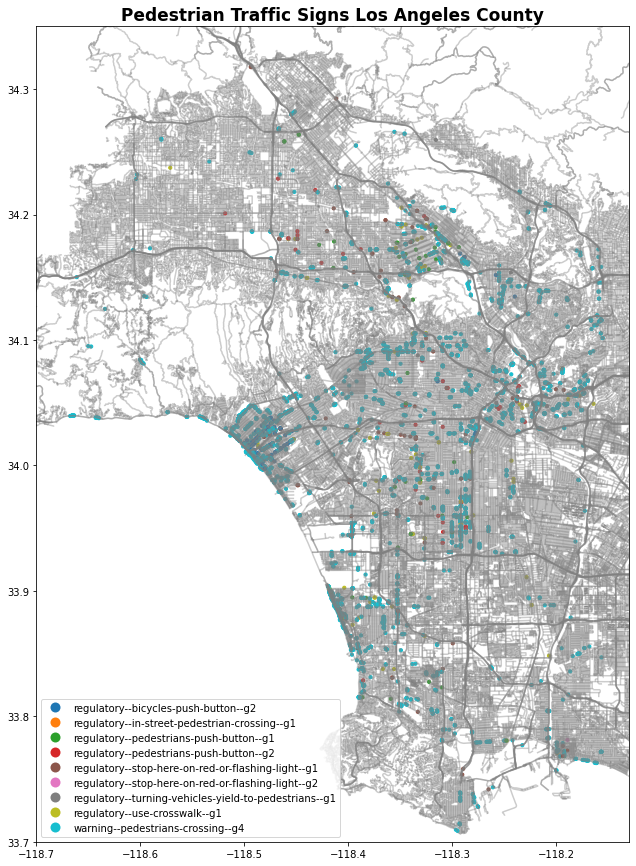

In [24]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15,15))
# add .shp mapfile to axes
street_map.plot(ax=ax, alpha=0.4, color='grey')
# add geodataframe to axes
# assign ‘value’ variable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
traffic_signs.plot(column='value',ax=ax,alpha=1, legend=True, markersize=10)
# add title to graph
plt.title("Pedestrian Traffic Signs Los Angeles County", fontsize=17,fontweight="bold")
# set latitiude and longitude boundaries for map display
plt.xlim(-118.7,-118.13)
plt.ylim( 33.7,34.35)
# show map
plt.show()

In [25]:
fig.savefig("Images/LA_pedestrian_traffic_signs.png")

## Filter points to only Wilshire neighborhood

1. dataset filtered to pedestrian crosswalks: traffic_signs

2. street map shape file: street_map

3. Greater Wilshire Shape file: Greater_Wilshire

In [26]:
# Select only Greater Wilshire Boundary
boundary = Greater_Wilshire.geometry
myShapeTmp = traffic_signs[traffic_signs.geometry.within(boundary)]

/usr/local/lib/python3.7/dist-packages/geopandas/base.py:32: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4326 +type=crs
Right CRS: EPSG:4326

  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1299: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)


In [27]:
print(boundary)

32    POLYGON ((-118.34406 34.08708, -118.33098 34.0...
Name: geometry, dtype: geometry


# Plot Greater Wilshire Neighborhood

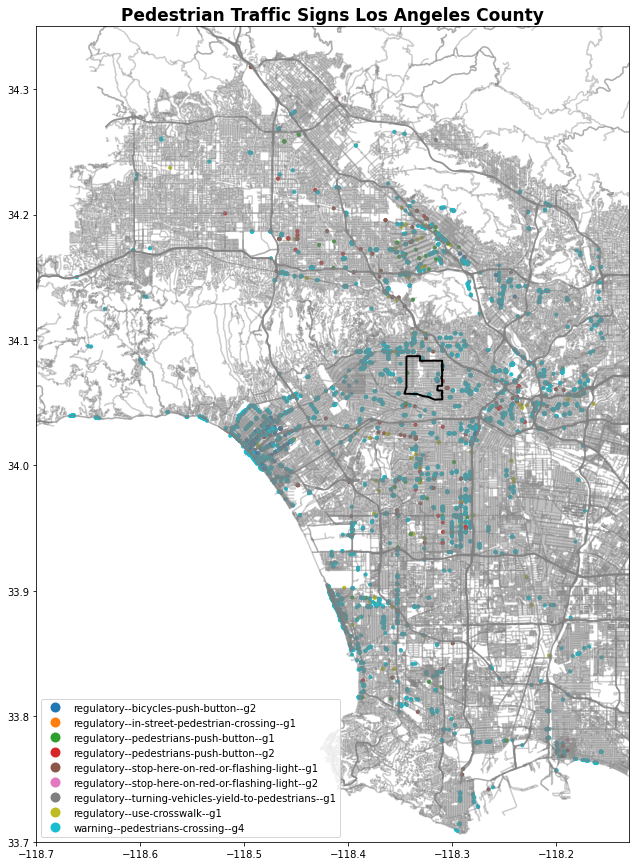

In [28]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15,15))
# add .shp mapfile to axes
street_map.plot(ax=ax, alpha=0.4, color='grey')
# plot Greater Wilshire Boundary
Greater_Wilshire.geometry.boundary.plot(color=None,edgecolor='k',linewidth = 2,ax=ax)
# add geodataframe to axes
# assign ‘value’ variable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
traffic_signs.plot(column='value',ax=ax,alpha=1, legend=True, markersize=10)
# add title to graph
plt.title("Pedestrian Traffic Signs Los Angeles County", fontsize=17,fontweight="bold")
# set latitiude and longitude boundaries for map display
plt.xlim(-118.7,-118.13)
plt.ylim( 33.7,34.35)
# show map
plt.show()

In [29]:
fig.savefig("Images/Greater_wilshire_pedestrian_traffic_signs.png")

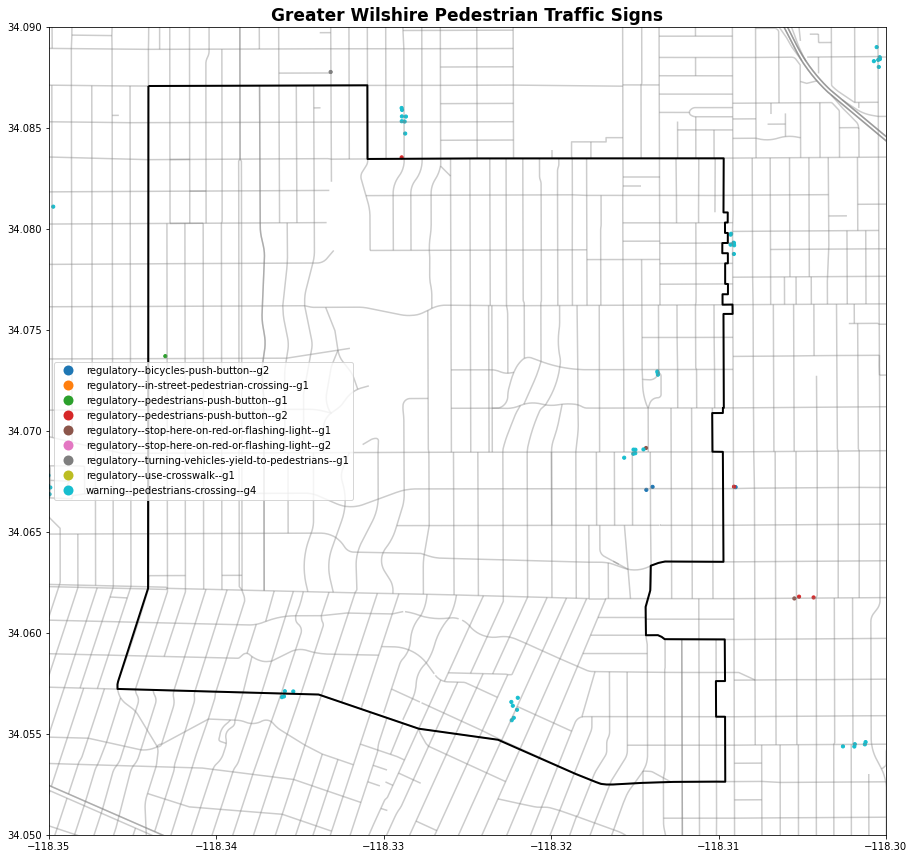

In [30]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15,15))
# add .shp mapfile to axes
street_map.plot(ax=ax, alpha=0.4, color='grey')
# plot Greater Wilshire Boundary
Greater_Wilshire.geometry.boundary.plot(color=None,edgecolor='k',linewidth = 2,ax=ax)
# add geodataframe to axes
# assign ‘value’ variable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
traffic_signs.plot(column='value',ax=ax,alpha=1, legend=True, markersize=10)
# set legend position
#fig.legend(bbox_to_anchor=(1.3, 0.6))
#ax.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=2,borderaxespad=0, frameon=False)
# add title to graph
plt.title("Greater Wilshire Pedestrian Traffic Signs", fontsize=17,fontweight="bold")
# plot legend
#plt.legend(traffic_signs['value'], bbox_to_anchor=(1.3, 0.6))
# set latitiude and longitude boundaries for map display
plt.xlim(-118.35,-118.3)
plt.ylim( 34.05,34.09)
# Wilshire accident boundary
#plt.xlim(-118.4,-118.3)
#plt.ylim( 34.02,34.1)
# show map
plt.show()

In [31]:
fig.savefig("Images/greater_wilshire_pedestrian_traffic_signs_closeup.png")

# Traffic Collision Data from 2010 to Present

Data Source: https://data.lacity.org/Public-Safety/Traffic-Accidents-by-date/2mzm-av8t

### MO Codes of Interest:
  1. 3003 T/C-VehvsPed
  2. 3008 T/C - Veh vs Bike
  3. 3016 T/C - Bike vs Veh
  4. 3501 T/C - Ped Actions

## Data Exploration and Cleaning

In [32]:
# Import traffic collision data
traffic = pd.read_csv('Data/Traffic_Collision_Data_from_2010_to_Present.csv')

In [33]:
# Split coordinates column into longitude and latitude columns
traffic[['latitude','longitude']] = traffic.Location.str.strip('()').str.split(",", expand=True).apply(pd.to_numeric)

In [34]:
traffic.head()

DR Number Date Reported  ... latitude  longitude
0  190319651    08/24/2019  ...  34.0255  -118.3002
1  190319680    08/30/2019  ...  34.0256  -118.3089
2  190413769    08/25/2019  ...  34.0738  -118.2078
3  190127578    11/20/2019  ...  34.0492  -118.2391
4  190319695    08/30/2019  ...  34.0108  -118.3182

[5 rows x 20 columns]

In [35]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556491 entries, 0 to 556490
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   DR Number               556491 non-null  int64  
 1   Date Reported           556491 non-null  object 
 2   Date Occurred           556491 non-null  object 
 3   Time Occurred           556491 non-null  int64  
 4   Area ID                 556491 non-null  int64  
 5   Area Name               556491 non-null  object 
 6   Reporting District      556491 non-null  int64  
 7   Crime Code              556491 non-null  int64  
 8   Crime Code Description  556491 non-null  object 
 9   MO Codes                469241 non-null  object 
 10  Victim Age              474438 non-null  float64
 11  Victim Sex              547673 non-null  object 
 12  Victim Descent          546800 non-null  object 
 13  Premise Code            555528 non-null  float64
 14  Premise Description 

In [36]:
traffic.describe()

DR Number  Time Occurred  ...       latitude      longitude
count  5.564910e+05  556491.000000  ...  556491.000000  556491.000000
mean   1.536604e+08    1357.197220  ...      34.040768    -118.222649
std    3.126600e+07     596.783975  ...       1.177392       4.072084
min    1.001000e+08       1.000000  ...       0.000000    -118.667300
25%    1.303051e+08     930.000000  ...      34.018200    -118.440000
50%    1.521096e+08    1430.000000  ...      34.063800    -118.336100
75%    1.809218e+08    1820.000000  ...      34.175800    -118.281600
max    2.199091e+08    2359.000000  ...      34.692000       0.000000

[8 rows x 9 columns]

In [37]:
# Count frequency of each variable in value column
print(traffic['MO Codes'].value_counts().nlargest(20))

0605                                            14882
3101 3401 3701 3006 3030                         8572
3101 3401 3701 3004 3030                         7816
3006 3028 3030 3035 3037 3101 3401 3701 4027     6244
3004 3028 3030 3035 3037 3101 3401 3701 4027     5126
3004 3037 3026 3101 3401 3701 4026               5124
1501                                             5031
3004 3036 3026 3101 3401 3701 4026               4090
3004 3026 3035 3037 3101 3401 3701 4027          3941
3101 3401 3701 3004 3026                         3546
3004 3026 3035 3036 3101 3401 3701 4027          3541
3004 3037 3030 3028 3101 3401 3701 4026          3290
3101 3401 3701 3004 3026 3036                    2849
3004 3036 3025 3101 3401 3701 4026               2406
3101 3401 3701 3004 3030 3036                    2324
3006 3037 3030 3028 3101 3401 3701 4026          2182
4025 3037 3006 3028 3030 3101                    2048
0605 1300                                        1984
4025 3037 3004 3028 3030 310

In [38]:
# Count null values in each column
traffic.isnull().sum()

DR Number                     0
Date Reported                 0
Date Occurred                 0
Time Occurred                 0
Area ID                       0
Area Name                     0
Reporting District            0
Crime Code                    0
Crime Code Description        0
MO Codes                  87250
Victim Age                82053
Victim Sex                 8818
Victim Descent             9691
Premise Code                963
Premise Description         964
Address                       0
Cross Street              26667
Location                      0
latitude                      0
longitude                     0
dtype: int64

In [39]:
# Rename column headers
traffic.rename(columns = {'MO Codes':'mo_codes'}, inplace = True)

In [40]:
# Split mo_codes into multiple rows
traffic['mo_codes'] = traffic['mo_codes'].str.split()
traffic_split = traffic.explode('mo_codes').reset_index(drop=True)

In [41]:
print("traffic_signs shape: ",traffic_split.shape)

traffic_signs shape:  (3156564, 20)


In [42]:
# Count frequency of each variable in mo_codes column
print(traffic_split['mo_codes'].value_counts().nlargest(20))

3101    406774
3701    336179
3401    336025
3004    241270
3037    215936
3030    186598
3028    151766
3026    133538
3036    115954
3006    104910
3035     98048
4026     80496
0605     68079
3025     60372
4027     58245
3034     56875
3029     40910
4025     33694
3003     30319
3011     29305
Name: mo_codes, dtype: int64


In [43]:
# Convert to numeric
traffic_split['mo_codes'] = pd.to_numeric(traffic_split['mo_codes'])

In [44]:
# Drop NA values
traffic_split = traffic_split.dropna(axis=0, subset=['mo_codes'])

In [45]:
# Convert from float64 to int64
traffic_split['mo_codes'] = traffic_split['mo_codes'].astype(np.int64)

In [46]:
# Make new dataframe with only relevant MO codes
mo_code = [3003,3008,3016,3501]
traffic_mo_df = traffic_split[traffic_split['mo_codes'].isin(mo_code)]

In [47]:
# Rename Date Occurred Column
traffic_mo_df = traffic_mo_df.rename(columns = {"Date Occurred":"Date_Occurred"})

In [48]:
print("traffic_signs shape: ",traffic_mo_df.shape)

traffic_signs shape:  (49956, 20)


In [49]:
# Count frequency of each variable in mo_codes column
print(traffic_mo_df['mo_codes'].value_counts().nlargest(20))

3003    30319
3008    17683
3016     1401
3501      553
Name: mo_codes, dtype: int64


In [50]:
# Convert from float64 to string
traffic_mo_df['mo_codes'] = traffic_mo_df['mo_codes'].apply(str)

In [51]:
traffic_mo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49956 entries, 32 to 3156496
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DR Number               49956 non-null  int64  
 1   Date Reported           49956 non-null  object 
 2   Date_Occurred           49956 non-null  object 
 3   Time Occurred           49956 non-null  int64  
 4   Area ID                 49956 non-null  int64  
 5   Area Name               49956 non-null  object 
 6   Reporting District      49956 non-null  int64  
 7   Crime Code              49956 non-null  int64  
 8   Crime Code Description  49956 non-null  object 
 9   mo_codes                49956 non-null  object 
 10  Victim Age              42907 non-null  float64
 11  Victim Sex              49673 non-null  object 
 12  Victim Descent          49636 non-null  object 
 13  Premise Code            49893 non-null  float64
 14  Premise Description     49893 non-n

## Replace mo codes with text

### MO Codes of Interest:
  1. 3003 T/C-VehvsPed
  2. 3008 T/C - Veh vs Bike
  3. 3016 T/C - Bike vs Veh
  4. 3501 T/C - Ped Actions

In [52]:
#replace mo_codes numbers with text
traffic_mo_df['mo_codes'] = traffic_mo_df['mo_codes'].replace(['3003', '3008', '3016', '3501'],['Vehicle vs Pedestrian', 'Vehicle vs Bike', 'Bike vs Vehicle', 'Pedestrian Actions'])

In [53]:
traffic_mo_df['Area Name'].unique()

array(['Hollenbeck', 'Harbor', 'Hollywood', 'Wilshire', 'West LA',
       'Van Nuys', 'West Valley', 'Northeast', '77th Street', 'Newton',
       'Pacific', 'N Hollywood', 'Foothill', 'Olympic', 'Topanga',
       'Central', 'Southwest', 'Southeast', 'Mission', 'Devonshire',
       'Rampart'], dtype=object)

In [54]:
# Filter dataset
a_name = ['Wilshire']
wilshire_df = traffic_mo_df[traffic_mo_df['Area Name'].isin(a_name)]
wilshire_df.head()

DR Number Date Reported  ... latitude  longitude
448  190713486    07/11/2019  ...  34.0735  -118.3571
482  190715500    08/22/2019  ...  34.0762  -118.3441
498  190715670    08/26/2019  ...  34.0762  -118.3511
506  190715683    08/24/2019  ...  34.0496  -118.3425
558  190715803    08/28/2019  ...  34.0649  -118.3440

[5 rows x 20 columns]

In [55]:
wilshire_df.to_csv(r'Data/pedestrian_traffic_signs_cleaned.csv', index = False)

# Plot Traffic Collision Data

In [56]:
# creating a geometry column 
geometry = [Point(xy) for xy in zip(traffic_mo_df['longitude'], traffic_mo_df['latitude'])]

# Coordinate reference system : WGS84
crs = {'init': 'epsg:4326'}

# Creating a Geographic data frame 
traffic_collision = gpd.GeoDataFrame(traffic_mo_df, crs=crs, geometry=geometry)

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [57]:
traffic_collision.to_csv(r'Data/pedestrian_traffic_collision_geometry.csv', index = False)

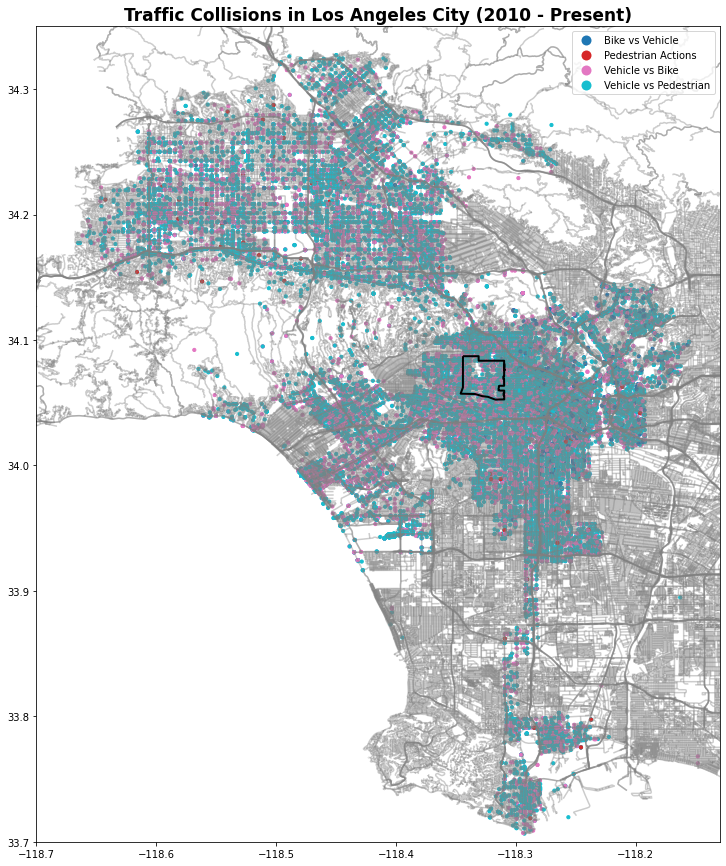

In [58]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15,15))
# add .shp mapfile to axes
street_map.plot(ax=ax, alpha=0.4,color='grey')
# plot Greater Wilshire Boundary
Greater_Wilshire.geometry.boundary.plot(color=None,edgecolor='k',linewidth = 2,ax=ax)
# add geodataframe to axes
# assign ‘value’ variable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
traffic_collision.plot(column='mo_codes',ax=ax,alpha=1, legend=True, markersize=10)
# add title to graph
plt.title("Traffic Collisions in Los Angeles City (2010 - Present)", fontsize=17,fontweight="bold")
# set latitiude and longitude boundaries for map display
plt.xlim(-118.7,-118.13)
plt.ylim( 33.7,34.35)
# show map
plt.show()

In [59]:
fig.savefig("Images/LA_traffic_collisions.png")

# Plot Wilshire Accidents

In [60]:
# Filter dataset for Wilshire Accidents
a_name = ['Wilshire']
wilshire_df = traffic_collision[traffic_collision['Area Name'].isin(a_name)]

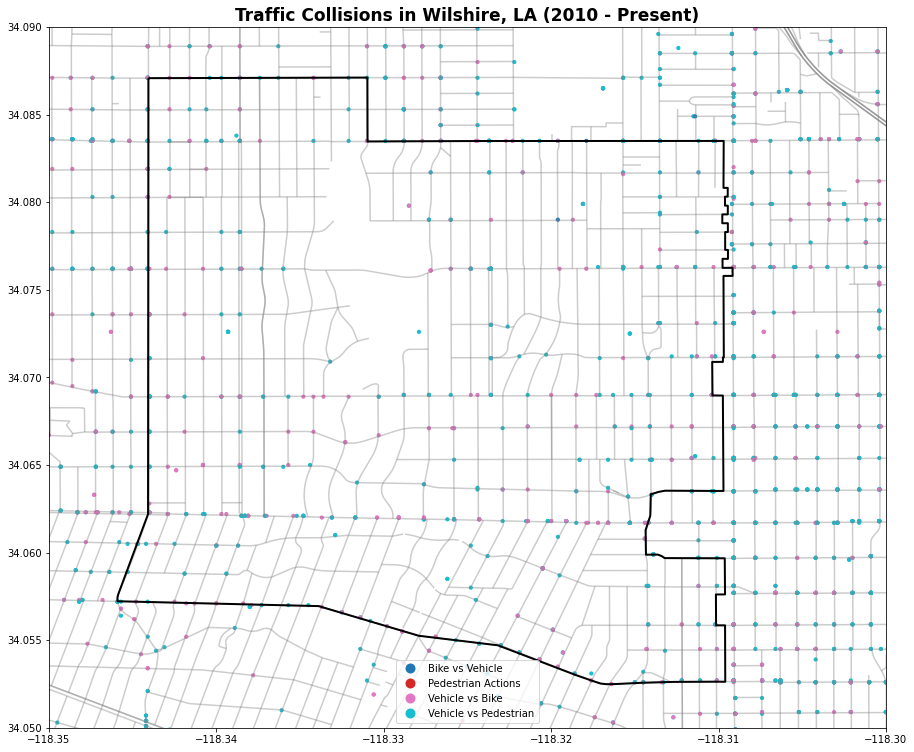

In [61]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15,15))
# add .shp mapfile to axes
street_map.plot(ax=ax, alpha=0.4,color='grey')
# plot Greater Wilshire Boundary
Greater_Wilshire.geometry.boundary.plot(color=None,edgecolor='k',linewidth = 2,ax=ax)
# add geodataframe to axes
# assign ‘value’ variable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
traffic_collision.plot(column='mo_codes',ax=ax,alpha=1, legend=True, markersize=10)
# add title to graph
plt.title("Traffic Collisions in Wilshire, LA (2010 - Present)", fontsize=17,fontweight="bold")
# set latitiude and longitude boundaries for map display
#plt.xlim(-118.4,-118.3)
#plt.ylim( 34.02,34.1)
#Greater Wilshire map boundary
plt.xlim(-118.35,-118.3)
plt.ylim( 34.05,34.09)
# show map
plt.show()

In [62]:
fig.savefig("Images/greater_wilshire_traffic_collisions.png")

In [63]:
# Count frequency of each variable in value column
print(wilshire_df['mo_codes'].value_counts().nlargest(10))

Vehicle vs Pedestrian    1575
Vehicle vs Bike          1012
Bike vs Vehicle             2
Name: mo_codes, dtype: int64


# Walk Bike 2019 Data (Not Useful)



In [64]:
walk_df = pd.read_csv('Data/2019_Walk___Bike_Count_Data.csv')
walk_df.head()

Location  ... Scooter_Weekend_Helmet
0   1st bw Mission and Anderson  ...                    0.0
1  1st bw San Pedro and Central  ...                    0.0
2       1st bw Soto and Mathews  ...                    0.0
3     4th bw Rossmore and Arden  ...                    1.0
4         7th bw Hill and Olive  ...                    3.0

[5 rows x 63 columns]

In [65]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 500)
walk_df['Location'].head()

0     1st bw Mission and Anderson
1    1st bw San Pedro and Central
2         1st bw Soto and Mathews
3       4th bw Rossmore and Arden
4           7th bw Hill and Olive
Name: Location, dtype: object

# Greater Wilshire Mapillary Points Dataset Cleaning and Exploration

https://www.mapillary.com/developer/api-documentation/#points

Description: A layer value for a point feature represents a specific point feature class. Below is a list of available classes.


###Filter Points by:

object--traffic-light--pedestrians

object--traffic-light--pedestrians

construction--flat--crosswalk-plain

In [66]:
# Read Greater Wilshire specific data
gwp_df = pd.read_csv('Data/greater-wilshire_points.csv')

In [67]:
#gwp_df.head()

In [68]:
# Count frequency of each variable in value column
print(gwp_df['value'].value_counts().nlargest(10))

object--support--pole                     18094
object--support--utility-pole              5203
object--street-light                       4176
object--sign--advertisement                3791
object--sign--store                        3632
construction--flat--driveway               3420
object--trash-can                          2674
object--traffic-light--general-upright     1987
object--banner                             1039
object--manhole                             967
Name: value, dtype: int64


In [69]:
# Filter dataset to only those with pedestrian or bicycle crosswalks
values = ['object--traffic-light--pedestrians',
          'object--traffic-light--pedestrians',
          'construction--flat--crosswalk-plain'
          ]
gwp_points = gwp_df[gwp_df.value.isin(values)]

In [70]:
# creating a geometry column 
geometry = [Point(xy) for xy in zip(gwp_points['longitude'], gwp_points['latitude'])]

# Coordinate reference system : WGS84
crs = {'init': 'epsg:4326'}

# Creating a Geographic data frame 
gwp = gpd.GeoDataFrame(gwp_points, crs=crs, geometry=geometry)

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [71]:
gwp.head()

Unnamed: 0  accuracy  ...  geometry_type                     geometry
40           40  0.487137  ...          Point  POINT (-118.34391 34.07626)
94           94  0.898545  ...          Point  POINT (-118.33837 34.06219)
260         260  8.367326  ...          Point  POINT (-118.31038 34.06339)
362         362  0.841751  ...          Point  POINT (-118.32869 34.08704)
440         440  0.587287  ...          Point  POINT (-118.34423 34.06879)

[5 rows x 14 columns]

In [72]:
gwp.to_csv(r'Data/Greater_wilshire_traffic_points.csv', index = False)

In [73]:
gwp.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 798 entries, 40 to 50965
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Unnamed: 0     798 non-null    int64   
 1   accuracy       798 non-null    float64 
 2   altitude       798 non-null    float64 
 3   direction      798 non-null    float64 
 4   first_seen_at  798 non-null    object  
 5   last_seen_at   798 non-null    object  
 6   key            798 non-null    object  
 7   layer          798 non-null    object  
 8   value          798 non-null    object  
 9   image_keys     798 non-null    object  
 10  latitude       798 non-null    float64 
 11  longitude      798 non-null    float64 
 12  geometry_type  798 non-null    object  
 13  geometry       798 non-null    geometry
dtypes: float64(5), geometry(1), int64(1), object(7)
memory usage: 93.5+ KB


In [74]:
# Count frequency of each variable in value column
print(gwp['value'].value_counts().nlargest(10))

object--traffic-light--pedestrians     583
construction--flat--crosswalk-plain    215
Name: value, dtype: int64


#Plotting Mapillary Points


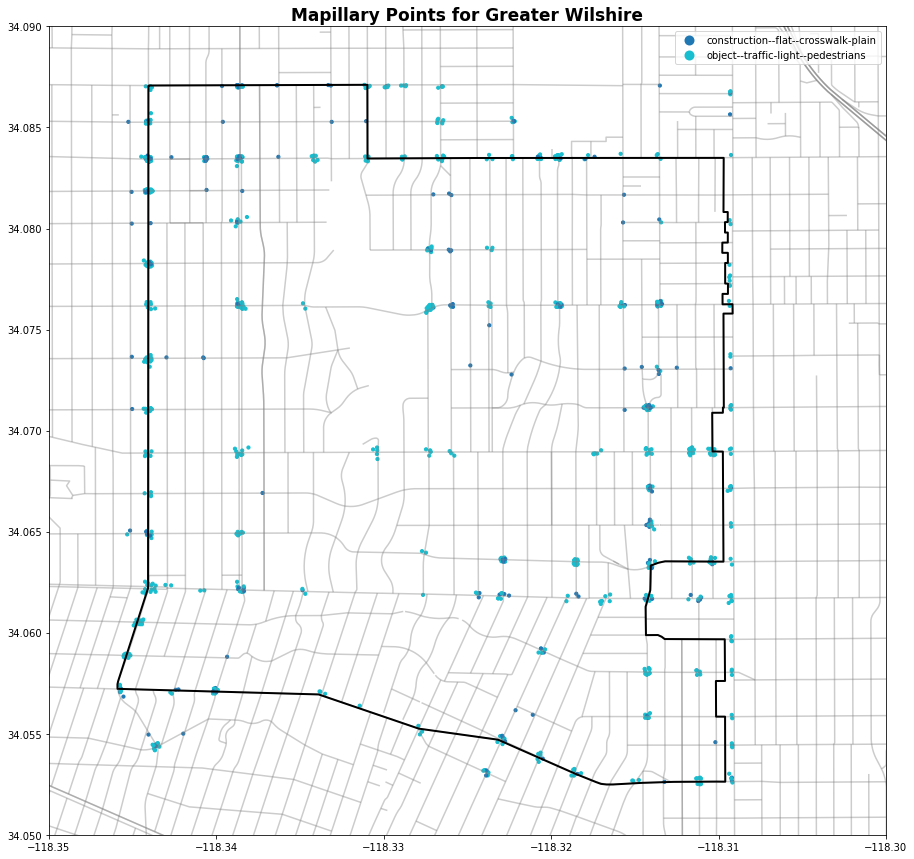

In [75]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15,15))
# add .shp mapfile to axes
street_map.plot(ax=ax, alpha=0.4,color='grey')
# plot Greater Wilshire Boundary
Greater_Wilshire.geometry.boundary.plot(color=None,edgecolor='k',linewidth = 2,ax=ax)
# add geodataframe to axes
# assign ‘value’ variable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
gwp.plot(column='value',ax=ax,alpha=1, legend=True, markersize=10)
# add title to graph
plt.title("Mapillary Points for Greater Wilshire", fontsize=17,fontweight="bold")
# set latitiude and longitude boundaries for map display
#plt.xlim(-118.4,-118.3)
#plt.ylim( 34.02,34.1)
#Greater Wilshire map boundary
plt.xlim(-118.35,-118.3)
plt.ylim( 34.05,34.09)
# show map
plt.show()

In [76]:
fig.savefig("Images/greater_wilshire_mapillary_points.png")

# Heatmap of Pedestrian Accidents with Folium

In [77]:
!pip install pandas folium

In [78]:
import folium
from folium import plugins
from folium.plugins import HeatMap

In [86]:
# Plot Heatmap of traffic collisions in Greater Wilshire
map_hooray = folium.Map(location=[34.070047, -118.326630],
                    zoom_start = 14) 
# Plot Neighborhood Boundary
gw_boundary = gpd.GeoSeries(Greater_Wilshire['geometry'])
geo_j = gw_boundary.to_json()
geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'orange'})
geo_j.add_to(map_hooray)
# Plot Traffic Signs Data
#geo_t = folium.Marker(
        #location = [traffic_signs['latitude'], traffic_signs['longitude']]
        #icon = icon,
        #popup=animals['population']
        #)
#geo_t.add_to(map_hooray)
# List comprehension to make out list of lists
heat_data = [[row['latitude'],row['longitude']] for index, row in traffic_collision.iterrows()]
# Plot it on the map
HeatMap(heat_data).add_to(map_hooray)
# Display the map
map_hooray

# Heatmap of Points

In [80]:
map_hooray = folium.Map(location=[34.070047, -118.326630],
                    zoom_start = 14) 
# Plot Neighborhood Boundary
gw_boundary = gpd.GeoSeries(Greater_Wilshire['geometry'])
geo_j = gw_boundary.to_json()
geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'orange'})
geo_j.add_to(map_hooray)
# List comprehension to make out list of lists
heat_data = [[row['latitude'],row['longitude']] for index, row in gwp.iterrows()]
# Plot it on the map
HeatMap(heat_data).add_to(map_hooray)
# Display the map
map_hooray

# Heatmap of Pedestrian Traffic Signs

In [81]:
map_hooray = folium.Map(location=[34.070047, -118.326630],
                    zoom_start = 14) 
# Plot Neighborhood Boundary
gw_boundary = gpd.GeoSeries(Greater_Wilshire['geometry'])
geo_j = gw_boundary.to_json()
geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'orange'})
geo_j.add_to(map_hooray)
# List comprehension to make out list of lists
heat_data = [[row['latitude'],row['longitude']] for index, row in traffic_signs.iterrows()]
# Plot it on the map
HeatMap(heat_data).add_to(map_hooray)
# Display the map
map_hooray

# Clustering of Pedestrian Traffic Signs and Traffic Accidents

Method: DBSCAN